In [38]:
import pandas as pd

import numpy as np

import pycountry_convert as pc

import itertools

import seaborn as sb

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.patches as mpatches

In [39]:
main_df = pd.read_excel("main_data.xlsx")

In [40]:
main_df = main_df.drop(columns = "Unnamed: 0")
main_df.head(5)

,Country Name,year,Continent,Social_support,Intentional_Homicide,Graduation_Ratio,Ado_Dropped
0,Afghanistan,2008,Asia,0.450662,NaN,NaN,NaN
1,Afghanistan,2009,Asia,0.552308,NaN,NaN,NaN
2,Afghanistan,2010,Asia,0.539075,NaN,NaN,NaN
3,Afghanistan,2011,Asia,0.521104,NaN,NaN,NaN
4,Afghanistan,2012,Asia,0.520637,NaN,NaN,NaN


In [41]:
main_df.year.value_counts()

2017    141
2019    140
2015    138
2016    137
2018    137
2012    136
2011    135
2014    134
2013    133
2021    122
2010    117
2020    116
2022    113
2009    108
2008    107
2007     97
2006     87
2005     27
Name: year, dtype: int64

In [42]:
years = [2015, 2015, 2016, 2017, 2018, 2019]

In [43]:
main_df = main_df[main_df["year"].isin(years)]
main_df.head(5)

,Country Name,year,Continent,Social_support,Intentional_Homicide,Graduation_Ratio,Ado_Dropped
7,Afghanistan,2015,Asia,0.528597,9.975262,NaN,NaN
8,Afghanistan,2016,Asia,0.559072,6.692419,NaN,NaN
9,Afghanistan,2017,Asia,0.490880,6.800695,NaN,NaN
10,Afghanistan,2018,Asia,0.507516,6.743573,9.7769,NaN
11,Afghanistan,2019,Asia,0.419973,7.180397,NaN,NaN


In [44]:
main_df = main_df.reset_index(drop = True)
main_df.head(5)

,Country Name,year,Continent,Social_support,Intentional_Homicide,Graduation_Ratio,Ado_Dropped
0,Afghanistan,2015,Asia,0.528597,9.975262,NaN,NaN
1,Afghanistan,2016,Asia,0.559072,6.692419,NaN,NaN
2,Afghanistan,2017,Asia,0.490880,6.800695,NaN,NaN
3,Afghanistan,2018,Asia,0.507516,6.743573,9.7769,NaN
4,Afghanistan,2019,Asia,0.419973,7.180397,NaN,NaN


In [66]:
main_df_transformed = main_df

main_df_transformed["Intentional_Homicide_log"] = np.log(main_df_transformed["Intentional_Homicide"])

## Exploratory Data Analysis

In [68]:
data_2015 = main_df_transformed[main_df_transformed["year"] == 2015]
data_2016 = main_df_transformed[main_df_transformed["year"] == 2016]
data_2017 = main_df_transformed[main_df_transformed["year"] == 2017]
data_2018 = main_df_transformed[main_df_transformed["year"] == 2018]

In [69]:
data_2015 = data_2015.sort_values(by = "Continent")
data_2016 = data_2016.sort_values(by = "Continent")
data_2017 = data_2017.sort_values(by = "Continent")
data_2018 = data_2018.sort_values(by = "Continent")

## Social Support Distribution (Image 2)

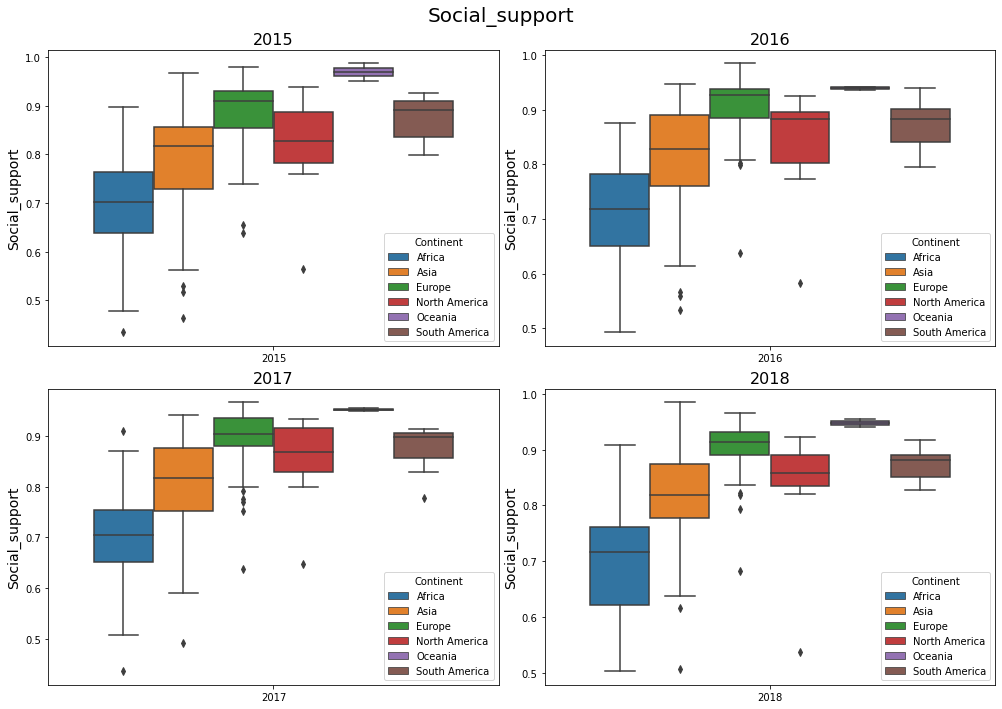

In [64]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Social_support', fontsize = 20)

ax1 = sb.boxplot(ax = axes[0,0], 
                 data = data_2015, 
                 x = "year",
                  y = "Social_support",
                  hue = "Continent")
ax1.set_ylabel("Social_support", fontsize = 14)
ax1.set_xlabel("")
axes[0,0].set_title("2015", fontsize = 16)


ax2 = sb.boxplot(ax = axes[0,1], 
                 data = data_2016, 
                 x = "year",
                  y = "Social_support",
                  hue = "Continent")
ax2.set_ylabel("Social_support", fontsize = 14)
ax2.set_xlabel("")
axes[0,1].set_title("2016", fontsize = 16)


ax3 = sb.boxplot(ax = axes[1,0], 
                 data = data_2017, 
                 x = "year",
                  y = "Social_support",
                  hue = "Continent")
ax3.set_ylabel("Social_support", fontsize = 14)
ax3.set_xlabel("")
axes[1,0].set_title("2017", fontsize = 16)


ax4 = sb.boxplot(ax = axes[1,1], 
                 data = data_2018, 
                 x = "year",
                  y = "Social_support",
                  hue = "Continent")
ax4.set_ylabel("Social_support", fontsize = 14)
ax4.set_xlabel("")
axes[1,1].set_title("2018", fontsize = 16)


plt.tight_layout(pad = 1, w_pad = 0.5, h_pad = 0.8)

#plt.savefig('Image2.png')

## Heatmap (Image 3)

In [73]:
data_2015_heatmap = data_2015[["Intentional_Homicide_log", "Graduation_Ratio", "Ado_Dropped", "Social_support"]]
data_2016_heatmap = data_2016[["Intentional_Homicide_log", "Graduation_Ratio", "Ado_Dropped", "Social_support"]]
data_2017_heatmap = data_2017[["Intentional_Homicide_log", "Graduation_Ratio", "Ado_Dropped", "Social_support"]]
data_2018_heatmap = data_2018[["Intentional_Homicide_log", "Graduation_Ratio", "Ado_Dropped", "Social_support"]]

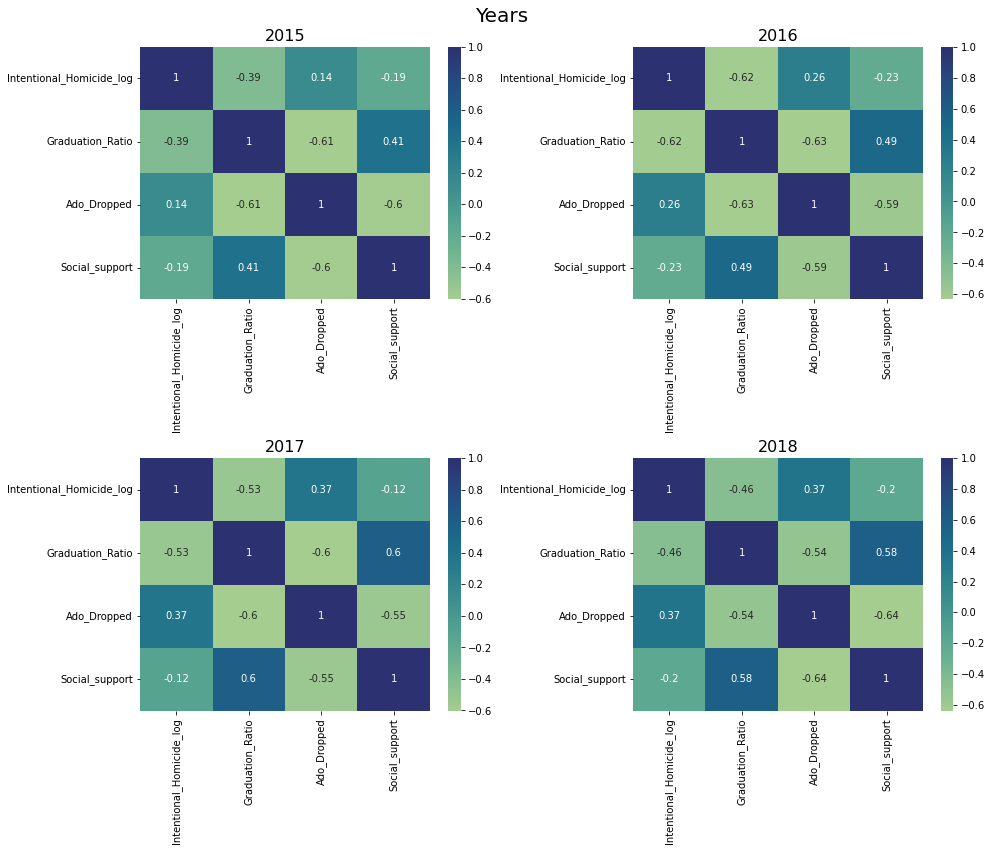

In [81]:
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
fig.suptitle('Years', fontsize = 20)



ax1 = sb.heatmap(ax = axes[0,0], 
                 data = data_2015_heatmap.corr(), 
                 annot = True, 
                 cmap="crest")

axes[0,0].set_title("2015", fontsize = 16)

ax2 = sb.heatmap(ax = axes[0,1], 
                 data = data_2016_heatmap.corr(), 
                 annot = True, 
                 cmap="crest")

axes[0,1].set_title("2016", fontsize = 16)

ax3 = sb.heatmap(ax = axes[1,0], 
                 data = data_2017_heatmap.corr(), 
                 annot = True, 
                 cmap="crest")

axes[1,0].set_title("2017", fontsize = 16)


ax2 = sb.heatmap(ax = axes[1,1], 
                 data = data_2018_heatmap.corr(), 
                 annot = True, 
                 cmap="crest")

axes[1,1].set_title("2018", fontsize = 16)


plt.tight_layout(pad = 1, w_pad = 0.5, h_pad = 0.8)

#plt.savefig('Image3.png')

In [87]:
len(main_df[main_df["Continent"] == "Africa"]["Country Name"].unique())

38

In [88]:
len(main_df[main_df["Continent"] == "Oceania"]["Country Name"].unique())

2